## Predicting who is likely to leave. A KNN aproach 

#### Questions to ask
1. Is customer service affecting churning?
2. Are the plans offerd affecting churning?
3. Are charges imposed affecting churning?

### Objectives


In [2]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Lets look at the first 5 rows to know how our dataset looks like

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Rows and columns

In [4]:
print(f'{df.shape}, \n {df.columns}')

(3333, 21), 
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


#### Datatypes 

In [5]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### EDA

1. We will drop unnecessary columns 
2. Encode objects and bools 

In [6]:
# Drop unnecessary columns
df_copy = df.drop(['state', 'account length', 'area code'], axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone number            3333 non-null   object 
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [7]:
# Transform categorical columns to numerical
from sklearn.preprocessing import LabelEncoder

df_en = df_copy.copy()

# Instantiate the encoder
le = LabelEncoder()

# Apply the encoder to categorical columns

for col in df_en.select_dtypes(exclude='number').columns:
    df_en[col] = le.fit_transform(df_en[col])

df_en.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone number            3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

### Visualize the charges against churn to see if it has any effect on churning

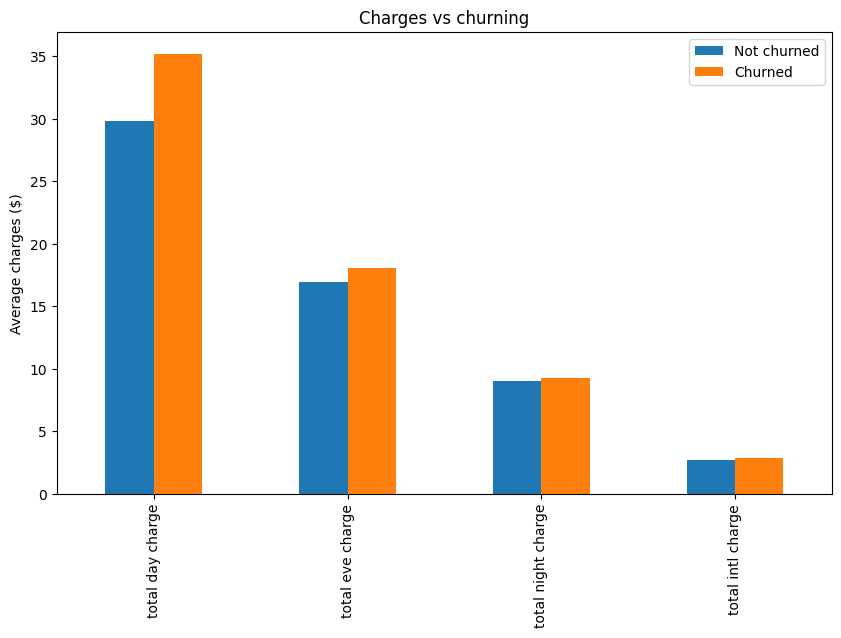

In [ ]:
# Why use mean
# Why do some people have more charges than others? - Is it because they use the phone more often?
charge_col = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
df_en.groupby('churn')[charge_col].mean().T.plot(kind='bar', figsize=(10,6)) 
plt.title('Charges vs churning')
plt.ylabel('Average charges ($)')
plt.legend(['Not churned', 'Churned'])
plt.show()

The people who churn have more charges 

Next we'll look at how customer service department impact the churn rate.


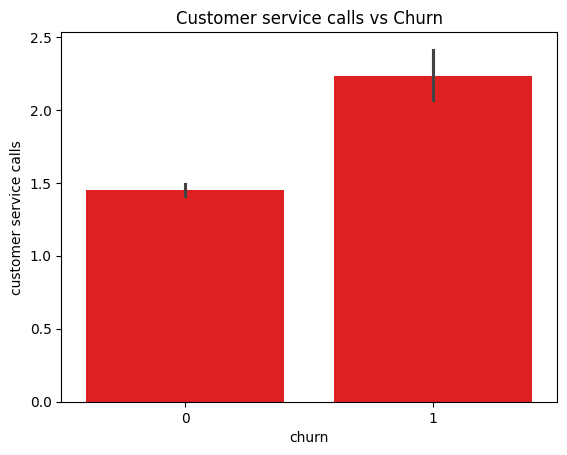

In [25]:
### Objective 
# Factors that cause customer dissatisfaction 
sns.barplot(y='customer service calls', x='churn', data=df_en, color='red')
plt.title('Customer service calls vs Churn')
plt.show()

Customers who tend to churn make more calls to customer cares office, this means that the challenges raised weren't delt with. We recommend identifying the main cause of the calls and deal with the issues raised.

Next we investigate if voice mail plan affects churn rate

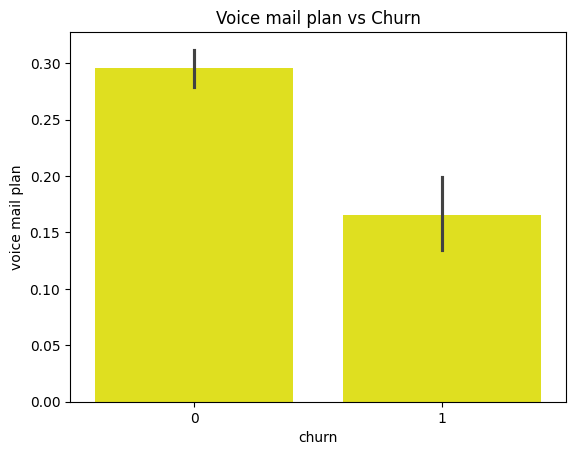

In [28]:
sns.barplot(x='churn', y='voice mail plan', data=df_en, color='yellow')
plt.title('Voice mail plan vs Churn')
plt.show()

Customers who churn tend to have lower voicemail plans compared to those who dont churn. Therefore a low voice mail plan, could be an indicator of a customer at risk of churning.

Lets see if international plan also affects churn rate.

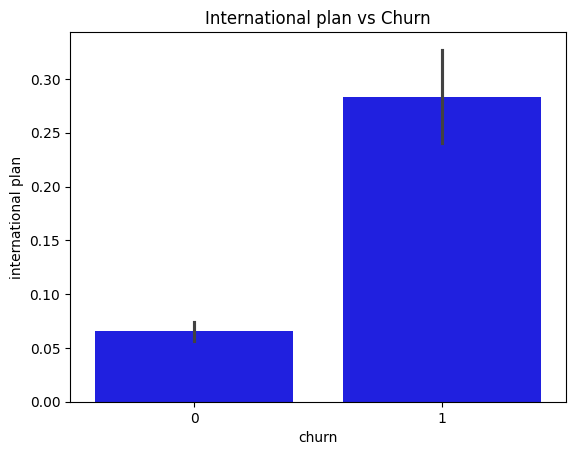

In [29]:
sns.barplot(y='international plan', x='churn', data=df_en, color='blue')
plt.title('International plan vs Churn')
plt.show()

From the graph, most of the customers who churn are heavy users of international plan, this might indicate a flaw in terms of the package ordered, or customers who are about to churn leave the country a lot. So we recommend putting targeted intervention to customers who use the international plan. 

Lets create a machine learning model to help use flag at-risk customers.